In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import breizhcrops as bzh
from breizhcrops import BreizhCrops

# Analysis on Part A

In [20]:
df123 = pd.read_csv('csv/A/trainlog123.csv')
df124 = pd.read_csv('csv/A/trainlog124.csv')
df134 = pd.read_csv('csv/A/trainlog134.csv')
df234 = pd.read_csv('csv/A/trainlog234.csv')

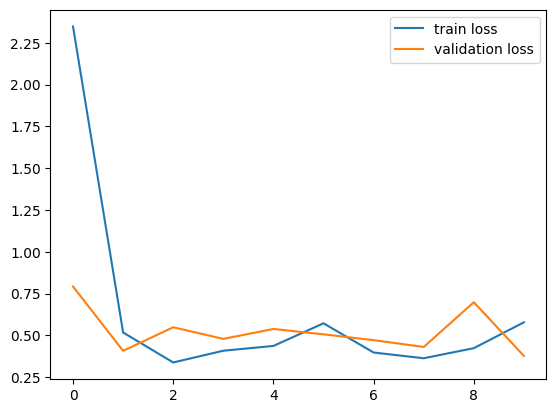

In [21]:
# Plot train and validation loss
plt.plot(df124['epoch'], df124['trainloss'], label='train loss')
plt.plot(df124['epoch'], df124['testloss'], label='validation loss')
plt.legend(['train loss', 'validation loss'])

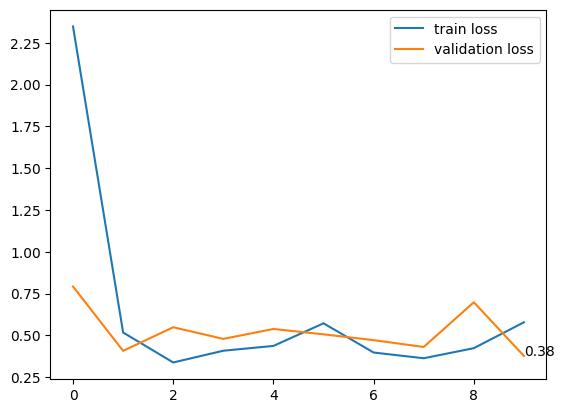

In [14]:
plt.plot(df124['epoch'], df124['trainloss'], label='train loss')
plt.plot(df124['epoch'], df124['testloss'], label='validation loss')
# Show last value of kappa at figure
plt.text(df124['epoch'].iloc[-1], df124['testloss'].iloc[-1], f'{df124["testloss"].iloc[-1]:.2f}')

plt.legend(['train loss', 'validation loss'])

# Obtaining Class Counts

In [17]:
frh01 = BreizhCrops("frh01")
frh02 = BreizhCrops("frh02")
frh03 = BreizhCrops("frh03")
frh04 = BreizhCrops("frh04")


In [45]:
# Assuming frh01 is a list of tuples where the first element is the data and the second is the label
classname_counts = {}

# Iterate through the dataset
for _, label, _ in frh01:
    # Retrieve the classname using the label
    classname = frh01.classname[label]
    if classname in classname_counts:
        classname_counts[classname] += 1  # Increment the count for this classname
    else:
        classname_counts[classname] = 1  # Initialize the count for this classname

classname_counts2 = {}
for _, label, _ in frh02:
    classname = frh02.classname[label]
    if classname in classname_counts2:
        classname_counts2[classname] += 1
    else:
        classname_counts2[classname] = 1
        
classname_counts3 = {}
for _, label, _ in frh03:
    classname = frh03.classname[label]
    if classname in classname_counts3:
        classname_counts3[classname] += 1
    else:
        classname_counts3[classname] = 1

classname_counts4 = {}
for _, label, _ in frh04:
    classname = frh04.classname[label]
    if classname in classname_counts4:
        classname_counts4[classname] += 1
    else:
        classname_counts4[classname] = 1

In [54]:
# concat all the dictionaries
classname_counts = {k: classname_counts.get(k, 0) + classname_counts2.get(k, 0) + classname_counts3.get(k, 0) + classname_counts4.get(k, 0) for k in set(classname_counts) | set(classname_counts2) | set(classname_counts3) | set(classname_counts4)}
classname_counts
classname_counts_df = pd.DataFrame(classname_counts.items(), columns=['classname', 'count'])

In [57]:
classname_counts_df.to_csv('classname_counts.csv', index=False)

In [202]:
classname_counts_df = pd.read_csv('csv/classname_counts.csv')

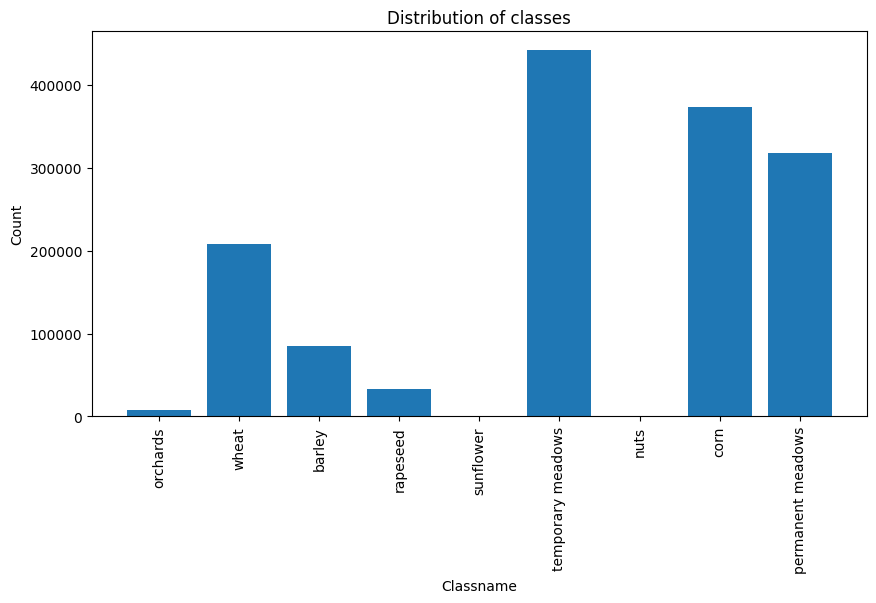

In [206]:
classname_counts_df
# Plot the distribution of the classes
plt.figure(figsize=(10, 5))
plt.bar(classname_counts_df['classname'], classname_counts_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Classname')
plt.ylabel('Count')
plt.title('Distribution of classes')
plt.show()
# Label x and y axis and give the plot a title


In [47]:
# Put 10th epoch values of each dataset in a dataframe
df = pd.DataFrame({
    'dataset': ['123', '124', '134', '234'],
    'trainloss': [df123['trainloss'].iloc[-1], df124['trainloss'].iloc[-1], df134['trainloss'].iloc[-1], df234['trainloss'].iloc[-1]],
    'testloss': [df123['testloss'].iloc[-1], df124['testloss'].iloc[-1], df134['testloss'].iloc[-1], df234['testloss'].iloc[-1]],
    'accuracy': [df123['accuracy'].iloc[-1], df124['accuracy'].iloc[-1], df134['accuracy'].iloc[-1], df234['accuracy'].iloc[-1]],
    'f1_weighted': [df123['f1_weighted'].iloc[-1], df124['f1_weighted'].iloc[-1], df134['f1_weighted'].iloc[-1], df234['f1_weighted'].iloc[-1]],
    'kappa': [df123['kappa'].iloc[-1], df124['kappa'].iloc[-1], df134['kappa'].iloc[-1], df234['kappa'].iloc[-1]],
})

# Analysis on Part A

In [143]:
A_123 = pd.read_csv("csv/A/trainlog123.csv")
A_124 = pd.read_csv("csv/A/trainlog124.csv")
A_134 = pd.read_csv("csv/A/trainlog134.csv")
A_234 = pd.read_csv("csv/A/trainlog234.csv")

In [144]:
A = pd.concat([A_123.iloc[-1:], A_124.iloc[-1:], A_134.iloc[-1:], A_234[-1:]]).reset_index(drop=True)
A.index = ['123', '124', '134', '234']


In [149]:
# Put means of each column to new row
A = A[['accuracy', 'f1_weighted', 'kappa']]

In [200]:
A.to_csv("A_results.csv")

# Analysis on Part B - X Decision

In [217]:
lower_02 = pd.read_csv('csv/B/X_Comparison/Lower_02.csv')
lower_04 = pd.read_csv('csv/B/X_Comparison/Lower_04.csv')
lower_06 = pd.read_csv('csv/B/X_Comparison/Lower_06.csv')
lower_08 = pd.read_csv('csv/B/X_Comparison/Lower_08.csv')
upper_02 = pd.read_csv('csv/B/X_Comparison/Upper_02.csv')
upper_04 = pd.read_csv('csv/B/X_Comparison/Upper_04.csv')
upper_06 = pd.read_csv('csv/B/X_Comparison/Upper_06.csv')
upper_08 = pd.read_csv('csv/B/X_Comparison/Upper_08.csv')

In [218]:
# Put lower_04 and upper_04 last index values in a dataframe
df2 = pd.DataFrame({
    'dataset': ['lower_02','lower_04', 'lower_06', 'lower_08', 'upper_02','upper_04', 'upper_06', 'upper_08'],
    'accuracy': [lower_02['accuracy'].iloc[-1],lower_04['accuracy'].iloc[-1], lower_06['accuracy'].iloc[-1], lower_08['accuracy'].iloc[-1],upper_02['accuracy'].iloc[-1], upper_04['accuracy'].iloc[-1], upper_06['accuracy'].iloc[-1], upper_08['accuracy'].iloc[-1]],
    'f1_weighted': [lower_02['f1_weighted'].iloc[-1],lower_04['f1_weighted'].iloc[-1], lower_06['f1_weighted'].iloc[-1], lower_08['f1_weighted'].iloc[-1], upper_02['f1_weighted'].iloc[-1], upper_04['f1_weighted'].iloc[-1], upper_06['f1_weighted'].iloc[-1], upper_08['f1_weighted'].iloc[-1]],
    'kappa': [lower_02['kappa'].iloc[-1],lower_04['kappa'].iloc[-1], lower_06['kappa'].iloc[-1], lower_08['kappa'].iloc[-1], upper_02['kappa'].iloc[-1], upper_04['kappa'].iloc[-1], upper_06['kappa'].iloc[-1], upper_08['kappa'].iloc[-1]],
})


In [219]:
df_02 = df2[df2['dataset'].str.contains('02')].reset_index(drop=True)
df_04 = df2[df2['dataset'].str.contains('04')].reset_index(drop=True)
df_06 = df2[df2['dataset'].str.contains('06')].reset_index(drop=True)
df_08 = df2[df2['dataset'].str.contains('08')].reset_index(drop=True)

In [220]:
df_02.index = ['lower_02', 'upper_02']
df_02.drop('dataset', axis=1, inplace=True)
df_04.index = ['lower_04', 'upper_04']
df_04.drop('dataset', axis=1, inplace=True)
df_06.index = ['lower_06', 'upper_06']
df_06.drop('dataset', axis=1, inplace=True)
df_08.index = ['lower_08', 'upper_08']
df_08.drop('dataset', axis=1, inplace=True)

In [255]:
df_08.index = ['Lower Baseline', 'Upper Baseline']
df_02.index = ['Lower Baseline', 'Upper Baseline']
df_04.index = ['Lower Baseline', 'Upper Baseline']
df_06.index = ['Lower Baseline', 'Upper Baseline']

In [252]:
df = pd.read_csv('08_results.csv')

In [260]:
df_02

,accuracy,f1_weighted,kappa
Lower Baseline,0.798136,0.798678,0.743430
Upper Baseline,0.808885,0.805969,0.756306


# Analysis on Part B - 4 Fold

In [262]:
lower_123 = pd.read_csv('csv/B/Lower123.csv')
upper_123 = pd.read_csv('csv/B/Upper123.csv')
df123 = pd.concat([lower_123.iloc[-1:], upper_123.iloc[-1:]]).reset_index(drop=True)
df123.index = ['Lower Baseline', 'Upper Baseline']

lower_124 = pd.read_csv('csv/B/Lower124.csv')
upper_124 = pd.read_csv('csv/B/Upper124.csv')
df124 = pd.concat([lower_124.iloc[-1:], upper_124.iloc[-1:]]).reset_index(drop=True)
df124.index = ['Lower Baseline', 'Upper Baseline']

lower_134 = pd.read_csv('csv/B/Lower134.csv')
upper_134 = pd.read_csv('csv/B/Upper134.csv')
df134 = pd.concat([lower_134.iloc[-1:], upper_134.iloc[-1:]]).reset_index(drop=True)
df134.index = ['Lower Baseline', 'Upper Baseline']

lower_234 = pd.read_csv('csv/B/Lower234.csv')
upper_234 = pd.read_csv('csv/B/Upper234.csv')
df234 = pd.concat([lower_234.iloc[-1:], upper_234.iloc[-1:]]).reset_index(drop=True)
df234.index = ['Lower Baseline', 'Upper Baseline']


In [263]:
df123[['accuracy', 'f1_weighted', 'kappa']]
df124[['accuracy', 'f1_weighted', 'kappa']]
df234[['accuracy', 'f1_weighted', 'kappa']]

,accuracy,f1_weighted,kappa
Lower Baseline,0.798136,0.798678,0.743430
Upper Baseline,0.808885,0.805969,0.756306


In [319]:
# Unite 2 indexes of each datase
df123_ = pd.DataFrame({col: [(df123[col].iloc[0], df123[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
df124_ = pd.DataFrame({col: [(df124[col].iloc[0], df124[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
df134_ = pd.DataFrame({col: [(df134[col].iloc[0], df134[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
df234_ = pd.DataFrame({col: [(df234[col].iloc[0], df234[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_13394/2345901061.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df123_ = pd.DataFrame({col: [(df123[col].iloc[0], df123[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_13394/2345901061.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df124_ = pd.DataFrame({col: [(df124[col].iloc[0], df124[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_13394/2345901061.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df134_ = pd.DataFrame({col: [(df134[col].iloc[0], df134[col].iloc[1])] for col in df}).applymap(lambda x: f'{x[0]:.4f} - {x[1]:.4f}')
/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_13394/2345901061.py:5: FutureWarning: Dat

In [321]:
df_united = pd.concat([df123_, df124_, df134_, df234_]).reset_index(drop=True)
df_united.index = ['123', '124', '134', '234']

,accuracy,f1_weighted,kappa
123,0.7762 - 0.7940,0.7572 - 0.7884,0.7068 - 0.7292
124,0.7770 - 0.7706,0.7740 - 0.7637,0.7097 - 0.6974
134,0.7747 - 0.7729,0.7681 - 0.7669,0.7059 - 0.7043
234,0.7981 - 0.8089,0.7987 - 0.8060,0.7434 - 0.7563


# Analysis on Part C

## Alpha = 0.5

In [168]:
a05_123 = pd.read_csv('csv/C/Alpha05_bad_results/DANN123.csv')
a05_234 = pd.read_csv('csv/C/Alpha05_bad_results/DANN234.csv')

In [172]:
a05_123[['accuracy', 'f1_weighted', 'kappa']].applymap(lambda x: f'{x:.4f}')

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_16507/17841848.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  a05_123[['accuracy', 'f1_weighted', 'kappa']].applymap(lambda x: f'{x:.4f}')


,accuracy,f1_weighted,kappa
0,0.3025,0.2019,0.0326
1,0.4782,0.3645,0.2703
2,0.4848,0.3886,0.2884
3,0.4640,0.3921,0.2690
4,0.2683,0.1922,-0.0080
5,0.4907,0.3628,0.2860
6,0.3651,0.2830,0.1233
7,0.2913,0.2384,0.0477
8,0.2804,0.2155,0.0217
9,0.3109,0.1972,0.0117


In [175]:
a05_234[['accuracy', 'f1_weighted', 'kappa']].applymap(lambda x: f'{x:.4f}')

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_16507/890173839.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  a05_234[['accuracy', 'f1_weighted', 'kappa']].applymap(lambda x: f'{x:.4f}')


,accuracy,f1_weighted,kappa
0,0.3563,0.2448,0.1090
1,0.6435,0.5703,0.5247
2,0.6616,0.6448,0.5660
3,0.6932,0.6631,0.5989
4,0.6768,0.6563,0.5879
5,0.7090,0.6913,0.6229
6,0.6999,0.6748,0.6079
7,0.7108,0.6926,0.6247
8,0.6906,0.6931,0.6039
9,0.6914,0.6727,0.6046


## lr=0.005, Dynamic Alpha

In [151]:
C__123 = pd.read_csv("csv/C/DynamicAlpha_lr05/DANN123.csv")
C__124 = pd.read_csv("csv/C/DynamicAlpha_lr05/DANN124.csv")
C__134 = pd.read_csv("csv/C/DynamicAlpha_lr05/DANN134.csv")
C__234 = pd.read_csv("csv/C/DynamicAlpha_lr05/DANN234.csv")

In [148]:
lr005 = pd.DataFrame({
    'Fold': ['123', '124', '134', '234'],
    'accuracy': [C__123['accuracy'].iloc[-1], C__124['accuracy'].iloc[-1], C__134['accuracy'].iloc[-1], C__234['accuracy'].iloc[-1]],
    'f1_weighted': [C__123['f1_weighted'].iloc[-1], C__124['f1_weighted'].iloc[-1], C__134['f1_weighted'].iloc[-1], C__234['f1_weighted'].iloc[-1]],
    'kappa': [C__123['kappa'].iloc[-1], C__124['kappa'].iloc[-1], C__134['kappa'].iloc[-1], C__234['kappa'].iloc[-1]],
})
lr005.drop('Fold', axis=1, inplace=True)
lr005.index = ['123', '124', '134', '234']

In [150]:
lr005.to_csv('lr005_results.csv')

## lr=0.001, Dynamic Alpha

In [154]:
C_123 = pd.read_csv("csv/C/DynamicAlpha_lr01/DANN123.csv")

C_124 = pd.read_csv("csv/C/DynamicAlpha_lr01/DANN124.csv")

C_134 = pd.read_csv("csv/C/DynamicAlpha_lr01/DANN134.csv")

C_234 = pd.read_csv("csv/C/DynamicAlpha_lr01/DANN234.csv")

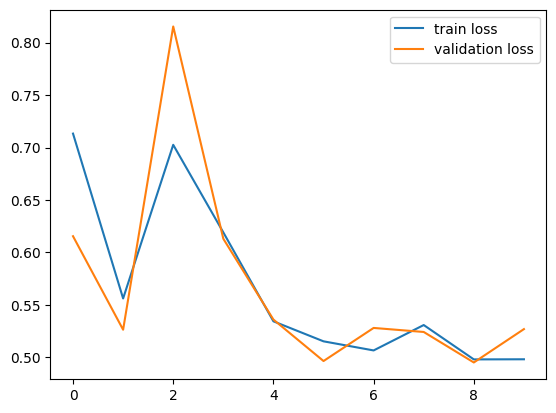

In [123]:
# Plot train and label loss in same figure
plt.plot(C_123['epoch'], C_123['labelloss'], label='train loss') # Train loss
plt.plot(C_123['epoch'], C_123['testloss'], label='label loss')
legend = plt.legend(['train loss', 'validation loss'])

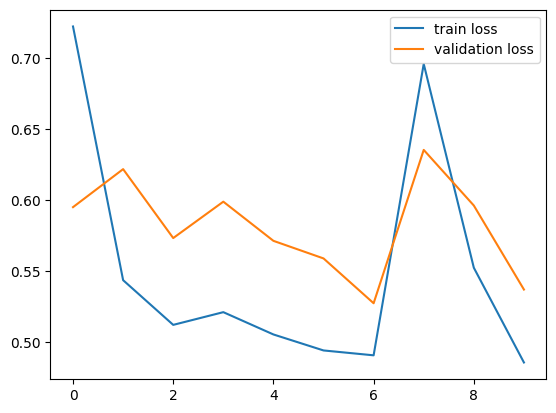

In [124]:
plt.plot(C_124['epoch'], C_124['labelloss'], label='train loss') # Train loss
plt.plot(C_124['epoch'], C_124['testloss'], label='label loss')
legend = plt.legend(['train loss', 'validation loss'])

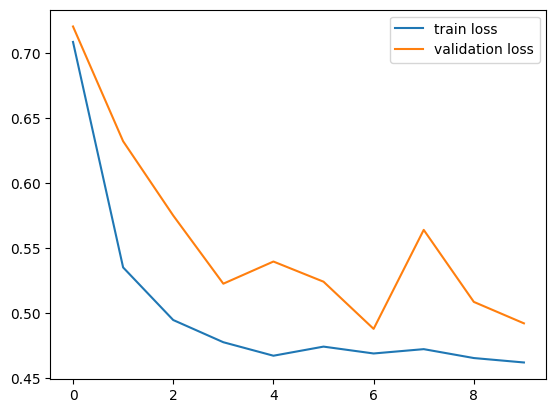

In [156]:
plt.plot(C_134['epoch'], C_134['labelloss'], label='train loss') # Train loss  
plt.plot(C_134['epoch'], C_134['testloss'], label='label loss')
legend = plt.legend(['train loss', 'validation loss'])


Text(0.5, 1.0, 'lr=0.001, Dynamic Alpha, Fold 4')

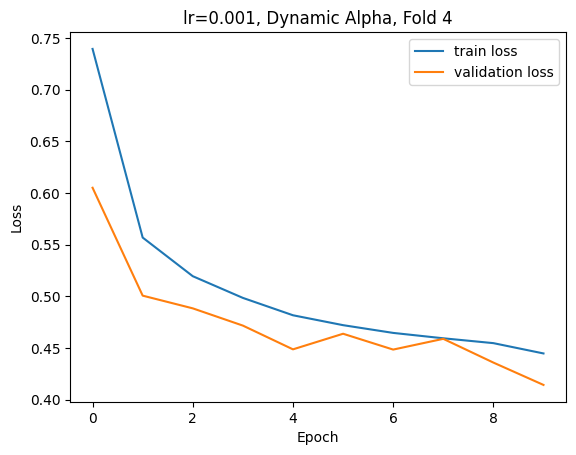

In [155]:
plt.plot(C_234['epoch'], C_234['labelloss'], label='train loss') # Train loss
plt.plot(C_234['epoch'], C_234['testloss'], label='label loss')
plt.legend(['train loss', 'validation loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('lr=0.001, Dynamic Alpha, Fold 4')

In [157]:
# Put lower_04 and upper_04 last index values in a dataframe
lr001 = pd.DataFrame({
    'Fold': ['123', '124', '134', '234'],
    'accuracy': [C_123['accuracy'].iloc[-1], C_124['accuracy'].iloc[-1], C_134['accuracy'].iloc[-1], C_234['accuracy'].iloc[-1]],
    'f1_weighted': [C_123['f1_weighted'].iloc[-1], C_124['f1_weighted'].iloc[-1], C_134['f1_weighted'].iloc[-1], C_234['f1_weighted'].iloc[-1]],
    'kappa': [C_123['kappa'].iloc[-1], C_124['kappa'].iloc[-1], C_134['kappa'].iloc[-1], C_234['kappa'].iloc[-1]]
})

In [158]:
lr001.drop('Fold', axis=1, inplace=True)

In [159]:
lr001.index = ['123', '124', '134', '234']

In [161]:
lr001.to_csv('lr001_results.csv')

In [178]:
lr001

,accuracy,f1_weighted,kappa
123,0.7703,0.7642,0.7010
124,0.7661,0.7479,0.6912
134,0.7771,0.7694,0.7096
234,0.8194,0.8147,0.7689


In [177]:
lr005.applymap(lambda x: f'{x:.4f}')

/var/folders/yk/ytz7qk2s2fqgv5qxfnfhcvj80000gn/T/ipykernel_16507/3302891229.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lr005.applymap(lambda x: f'{x:.4f}')


,accuracy,f1_weighted,kappa
123,0.6309,0.6035,0.5204
124,0.6018,0.5674,0.4720
134,0.6775,0.6537,0.5812
234,0.7994,0.8011,0.7459
